
<img width="60" src="https://drive.google.com/uc?export=view&id=1JQRWCUpJNAvselJbC_K5xa5mcKl1gBQe"> 



In [2]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fandango_scores.csv to fandango_scores (1).csv
User uploaded file "fandango_scores.csv" with length 15144 bytes


# 1 - Introduction



In the last lesson, we learned how to create bar plots to compare the average user rating a movie received from four movie review sites. We also learned how to create scatter plots to explore how ratings on one site compare with ratings on another site. We ended the mission with the observations that user ratings from Metacritic and Rotten Tomatoes spanned a larger range (1.0 to 5.0) while those from Fandango and IMDB spanned a smaller range (2.5 to 5 and 2 to 5 respectively).

In this lesson, we'll learn how to visualize the distributions of user ratings using **histograms** and **box plots**. We'll continue working with the same dataset from the last lesson. Recall that you can download the dataset **fandango_scores.csv** from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). We've read the dataset into pandas, selected the columns we're going to work with, and assigned the new Dataframe to **norm_reviews**.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
norm_reviews

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5
1,Cinderella (2015),4.00,3.75,3.55,4.5
2,Ant-Man (2015),4.50,4.05,3.90,4.5
3,Do You Believe? (2015),4.20,2.35,2.70,4.5
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0
5,The Water Diviner (2015),3.10,3.40,3.60,4.0
6,Irrational Man (2015),2.65,3.80,3.45,3.5
7,Top Five (2014),3.20,3.40,3.25,3.5
8,Shaun the Sheep Movie (2015),4.10,4.40,3.70,4.0
9,Love & Mercy (2015),4.35,4.25,3.90,4.0


# 2 - Frequency distribution



Let's first compare the **frequency distributions** of user ratings from Fandango with those from IMDB using tables. A column's [frequency distribution](https://en.wikipedia.org/wiki/Frequency_distribution) consists of the unique values in that column along with the count for each of those values (or their frequency). We can use [Series.value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to return the frequency distribution as Series object:

```python
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
```

The resulting Series object will be sorted by frequency in descending order:

<img width="200" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0eDJOdG9qMWJ0MUE">


While this ordering is helpful when we're looking to quickly find the most common values in a given column, it's not helpful when trying to understand the range that the values in the column span. We can use [Series.sort_index()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html) to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object):

```python
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
sorted_freq_counts = freq_counts.sort_index()
```

Here's what both frequency distributions look like side-by-side:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0QWRWN21mM0FzeVU">


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



**Description**:

1. Use the **value_counts()** method to return the frequency counts for the **Fandango_Ratingvalue** column. Sort the resulting Series object by the index and assign to **fandango_distribution**.
2. Use the **value_counts()** method to return frequency counts the **IMDB_norm** column. Sort the resulting Series object by the index and assign to **imdb_distribution**.
3. Use the **print()** function to display fandango_distribution and **imdb_distribution**.

In [5]:
# put your code here
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()
imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index()
print(fandango_distribution, imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64 2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


# 3 - Binning



Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the **Fandango_Ratingvalue** column ranges from 2.7 to 4.8 while the **IMDB_norm** column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

- What percent of the ratings are contained in the 2.0 to 4.0 range?
    - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites?
    
Comparing frequency distributions is also challenging because the **Fandango_Ratingvalue** column contains 21 unique values while **IMDB_norm** contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called **bins**. We can then sum the frequencies for the values that fall into each bin. Here's a diagram that makes binning easier to understand:

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0eGRDTDR1VExkdkU">


The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a [histogram](https://en.wikipedia.org/wiki/Histogram). Let's dive right into creating a histogram in matplotlib.


# 4 - Histogram in matplotlib



We can generate a histogram using [Axes.hist()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.hist). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:

- calculate the minimum and maximum value from the sequence of values we passed in
- create 10 bins of equal length that span the range from the minimum to the maximum value
- group unique values into the bins
- sum up the associated unique values
- generate a bar for the frequency sum for each bin

The default behavior of **Axes.hist()** is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the range parameter to specify the **range** we want matplotlib to use as a tuple:

```python
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
```

While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



**Description**:

1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a histogram from the values in the **Fandango_Ratingvalue** column using a range of **0** to **5**.
3. Use **plt.show()** to display the plot.

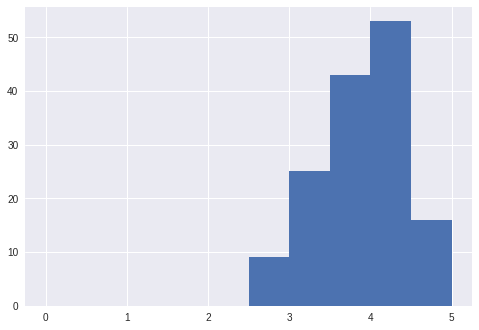

In [7]:
# put your code here
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

# 5 - Comparing histograms



If you recall, one of the questions we were looking to answer was:

- What percent of the ratings are contained in the 2.0 to 4.0 range?

We can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. We can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The **bins** parameter for **Axes.hist()** is the 2nd positional parameter, but can also be specified as a named parameter:

```python
# Either of these will work.
ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0, 5))
ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
```

Let's now generate histograms using 20 bins for all four columns. To ensure that the scales for the y-axis are the same for all histograms, let's set them manually using **Axes.set_ylim()**.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. For the subplot associated with **ax1**:
    - Generate a histogram of the values in the **Fandango_Ratingvalue** column using **20 bins** and a range of **0** to **5**.
    - Set the title to **Distribution of Fandango Ratings**.
2. For the subplot associated with **ax2**:
    - Generate a histogram of the values in the **RT_user_norm** column using **20 bins** and a range of **0** to **5**.
    - Set the title to **Distribution of Rotten Tomatoes Ratings**.
3. For the subplot associated with **ax3**:
    - Generate a histogram of the values in the **Metacritic_user_nom** column using **20 bins** and a range of **0** to **5**.
    - Set the title to **Distribution of Metacritic Ratings**.
4. For the subplot associated with **ax4**:
    - Generate a histogram of the values in the **IMDB_norm** column using **20 bins** and a range of **0** to **5**.
    - Set the title to **Distribution of IMDB Ratings**.
5. For all subplots:
    - Set the y-axis range to **0** to **50** using **Axes.set_ylim()**.
    - Set the y-axis label to **Frequency** using **Axes.set_ylabel()**.
    - Use **plt.show()** to display the plots.

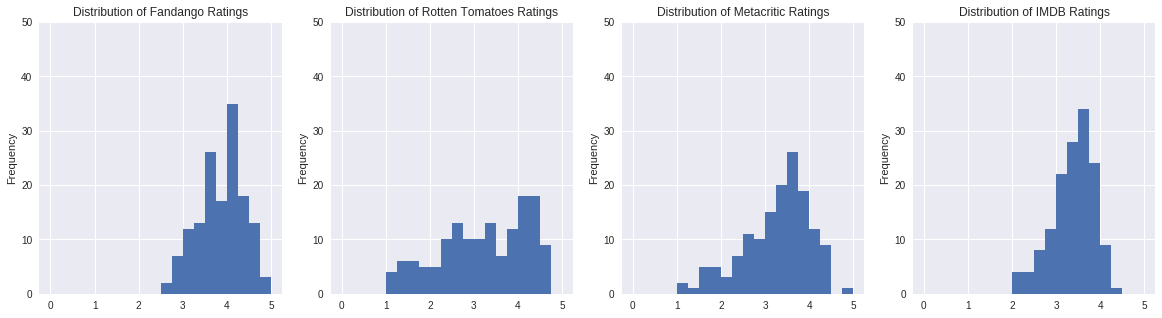

In [9]:
# put your code here
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,4,1)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
plt.title("Distribution of Fandango Ratings")
ax1.set_ylim(0, 50)
ax1.set_ylabel("Frequency")

ax2 = fig.add_subplot(1,4,2)
ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5))
plt.title("Distribution of Rotten Tomatoes Ratings")
ax2.set_ylim(0, 50)
ax2.set_ylabel("Frequency")

ax3 = fig.add_subplot(1,4,3)
ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0, 5))
plt.title("Distribution of Metacritic Ratings")
ax3.set_ylim(0, 50)
ax3.set_ylabel("Frequency")

ax4 = fig.add_subplot(1,4,4) #linhas, colunas, posiçãp
ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0, 5))
plt.title("Distribution of IMDB Ratings")
ax4.set_ylim(0, 50)
ax4.set_ylabel("Frequency")

plt.show()

# 6 - Quartiles

From the histograms, we can make the following observations:

- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent [quartiles](https://en.wikipedia.org/wiki/Quartile). The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quantile covers an equal number of values (1/4th of the total values). To visualize quartiles, we need to use a box plot, also referred to as a [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot).

# 7 - Box plot



A box plot consists of **box-and-whisker** diagrams, which represents the different quartiles in a visual way. Here's a box plot of the values in the **RT_user_norm** column:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0R1loNlM0cjI5ZU0">

The two regions contained within the box in the middle make up the **interquartile range**, or **IQR**. The [IQR](https://en.wikipedia.org/wiki/Interquartile_range) is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

We can generate a boxplot using [Axes.boxplot()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.boxplot).

```python
ax.boxplot(norm_reviews['RT_user_norm'])
```

Matplotlib will sort the values, calculate the quartiles that divide the values into four equal regions, and generate the box and whisker diagram.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

**Description**:

1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a box plot from the values in the **RT_user_norm** column.
    - Set the y-axis limit to range from **0** to **5**.
    - Set the x-axis tick label to **Rotten Tomatoes**.
3. Use **plt.show()** to display the plot.

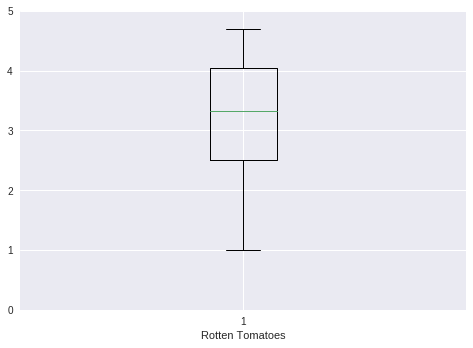

In [0]:
# put your code here
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0, 5)
ax.set_xlabel("Rotten Tomatoes")

plt.show()

# 8 -  Multiple box plots

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:
- the bottom 25% of user ratings range from around 1 to 2.5
- the top 25% of of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. When selecting multiple columns to pass in to **Axes.boxplot()**, we need to use the **values** accessor to return a multi-dimensional numpy array:

```ptyhon
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.boxplot(norm_reviews[num_cols].values)
```

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a box plot containing a box-and-whisker diagram for each column in **num_cols**.
3. Set the x-axis tick labels to the column names in **num_cols** and rotate the ticks by **90 degrees**.
4. Set the y-axis limit to range from **0** to **5**.
5. Use **plt.show()** to display the plot.

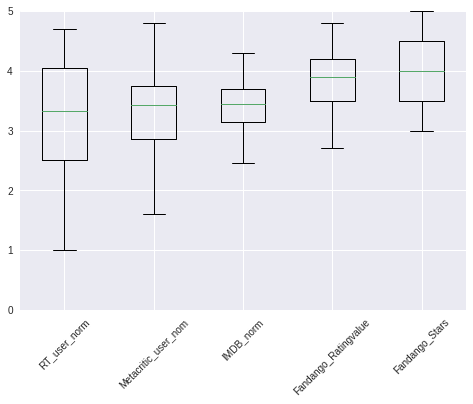

In [14]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

# put your code here
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.boxplot(reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=45)
ax.set_ylim(0, 5)

plt.show()

# 9 - Conclusion

From the boxplot, we can reach the following conclusions:

- user ratings from Rotten Tomatoes and Metacritic span a larger range of values
- user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values